### 举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq #最小二乘法
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [19]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 正态分布
y_= real_func(x)
y = [y1 + np.random.normal(0, 0.1) for y1 in y_]

-0.002274473208464547

In [24]:
def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M = 0

Fitting Parameters: [0.0134872]


(array([0.0134872]), 1)

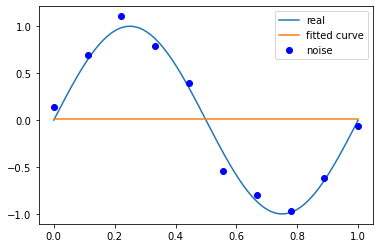

In [25]:
fitting()

### M = 1

Fitting Parameters: [-1.47419545  0.75058493]


(array([-1.47419545,  0.75058493]), 1)

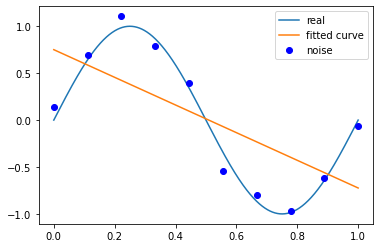

In [26]:
fitting(M=1)

### M = 3

Fitting Parameters: [ 20.274802   -30.0865637    9.73928095   0.09797043]


(array([ 20.274802  , -30.0865637 ,   9.73928095,   0.09797043]), 1)

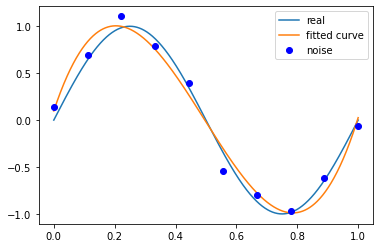

In [27]:
fitting(M=3)

### M = 9

Fitting Parameters: [-4.98574695e+04  2.24631382e+05 -4.25134601e+05  4.39002716e+05
 -2.68737895e+05  9.90843724e+04 -2.12697219e+04  2.37948636e+03
 -9.84657614e+01  1.37395773e-01]


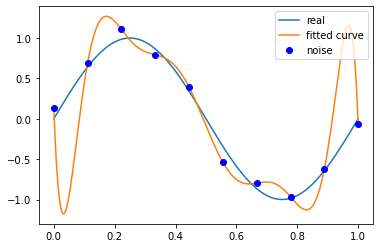

In [32]:
p_lsq_9 = fitting(M=9)

# 正则化

In [29]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [35]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))
p_lsq_regularization

(array([ -3.99575829,  -3.06583668,   0.28811701,   5.10397525,
          8.77004236,   6.68886948,  -5.07582668, -16.7413179 ,
          7.84095431,   0.12210784]),
 1)

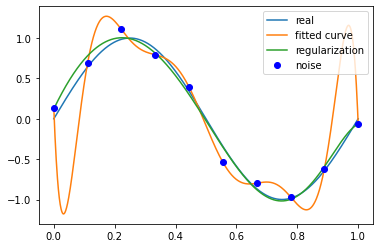

In [33]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
plt.show()